In [34]:
pip show tensorflow

Name: tensorflow
Version: 2.20.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\KINTA\anaconda3\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google_pasta, grpcio, h5py, keras, libclang, ml_dtypes, numpy, opt_einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing_extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [35]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [36]:
# load data from tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [37]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

In [38]:
# Reshape for CNN input (batch, height, width, channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [39]:
# Class Labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [40]:
# Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [41]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.8236 - loss: 0.4915 - val_accuracy: 0.8696 - val_loss: 0.3575
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.8799 - loss: 0.3312 - val_accuracy: 0.8771 - val_loss: 0.3316
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.8960 - loss: 0.2855 - val_accuracy: 0.9004 - val_loss: 0.2723
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9054 - loss: 0.2578 - val_accuracy: 0.9063 - val_loss: 0.2642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9128 - loss: 0.2344 - val_accuracy: 0.9086 - val_loss: 0.2540
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9200 - loss: 0.2137 - val_accuracy: 0.9042 - val_loss: 0.2554
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9256 - loss: 0.1969 - val_accuracy: 0.9033 - val_loss: 0.2600
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9302 -

In [43]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 - 3s - 9ms/step - accuracy: 0.9083 - loss: 0.2672
Test Accuracy: 0.91


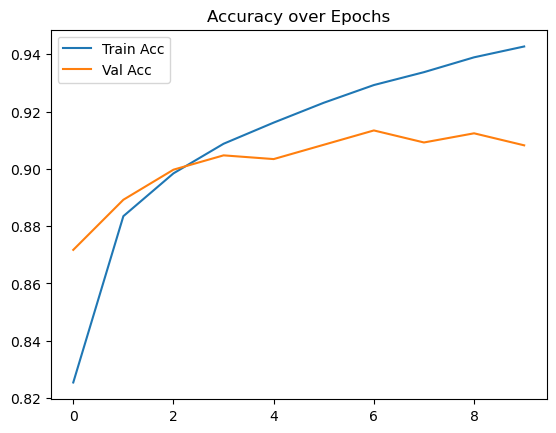

In [30]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

In [31]:
# Prediction Example
def predict_image(index):
    img = X_test[index].reshape(1,28,28,1)
    pred = model.predict(img)
    print(f"Predicted: {class_names[np.argmax(pred)]} | Actual: {class_names[y_test[index]]}")
    plt.imshow(X_test[index].reshape(28,28), cmap='gray')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted: Ankle boot | Actual: Ankle boot


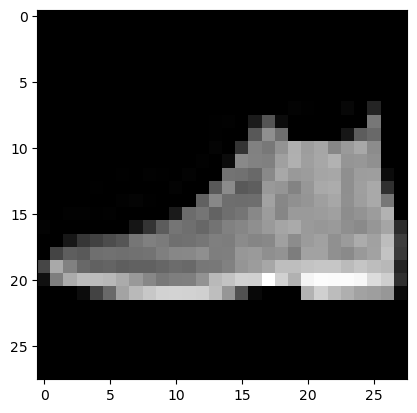

In [32]:
# Example
predict_image(0)